In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
def generate_utility(v1, v2, q1, q2, n):
    length = max(q1 + 1 + n, q2 + 1 + n)
    array_q = np.arange(length)
    array_u1 = np.concatenate((v1 * array_q[:q1 + 1], v1 * q1 * np.ones(length - q1 - 1)))
    array_u2 = np.concatenate((v2 * array_q[:q2 + 1], v2 * q2 * np.ones(length - q2 - 1)))
    return array_q, array_u1, array_u2

### Positive Relationship between $v$ and $\bar{q}$

### Negative Relationship between $v$ and $\bar{q}$

CASE 1:

In [57]:
vl, vh, ql, qh = 1, 2, 2, 5
v1, v2, q1, q2 = vh, vl, ql, qh
q, u1, u2 = generate_utility(v1, v2, q1, q2, 3)

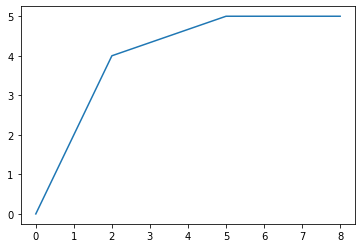

In [61]:
q[ql:qh + 1]

beta1 = (v2 * q2 - v1 * q1) / (q2 - ql)
beta0 = q1 * q2 * (v1 - v2) / (q2 - q1)

beta0 + beta1 * q[ql:qh + 1]

plt.plot(q, np.concatenate((u1[:ql], beta0 + beta1 * q[ql:qh + 1], u2[qh + 1:])))

In [52]:
q[:ql + 1]

array([0, 1, 2])

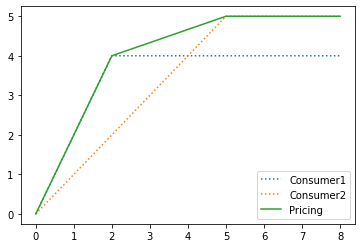

In [62]:
plt.plot(q, u1, label = "Consumer1", linestyle=":")
plt.plot(q, u2, label = "Consumer2", linestyle=":")
plt.plot(q, np.concatenate((u1[:ql], beta0 + beta1 * q[ql:qh + 1], u2[qh + 1:])), label = "Pricing")
plt.legend()

CASE 2:

In [11]:
array_q = np.concatenate((np.arange(1), 2 * np.ones(3)))
df = pd.DataFrame({"q": array_q})
df["u"] = df.q * 2
df

,q,u
0,0.0,0.0
1,2.0,4.0
2,2.0,4.0
3,2.0,4.0
